<a href="https://colab.research.google.com/github/Raf888-sr/ML/blob/Hotel-Booking/rns53_rafic_srouji_assign3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hotel Cancellation Prediction

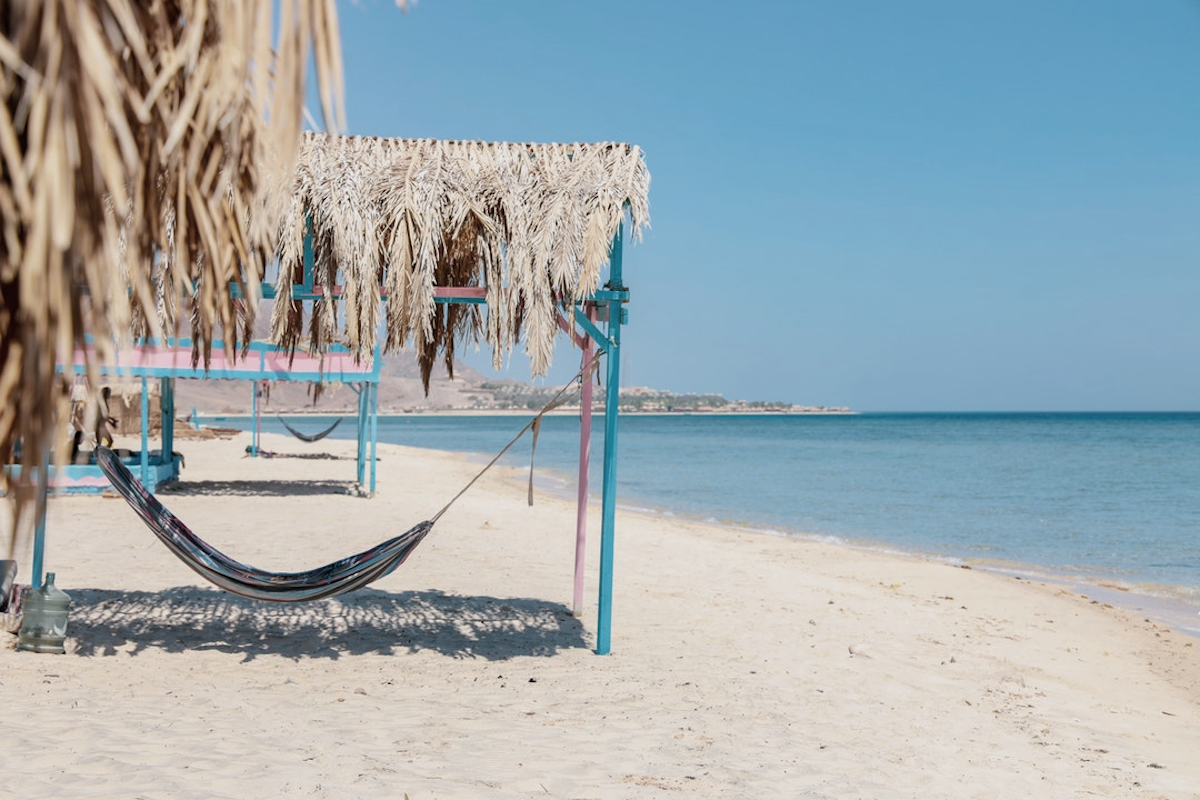

<div align="justify">The hotel industry has evolved throughout time, with the majority of reservations now done through third parties such as Expedia.com,Booking.com, and many others <a href = "https://www.hotelmanagement.net/tech/study-cancelation-rate-at-40-as-otas-push-free-change-policy">(source)</a>.Customers have become accustomed to free cancellation policies as a result of those Online Travel Agencies. In fact, according to a survey conducted by D-Edge Hospitality Solutions, the cancellation rate has increased by 6% over the last four years, reaching nearly 40% in 2018 <a href = "https://www.d-edge.com/how-online-hotel-distribution-is-changing-in-europe/">(source)</a>. This rise in cancellations makes it more difficult for hotels to estimate accurately, resulting in lower occupancy and income <a href = "https://www.d-edge.com/how-online-hotel-distribution-is-changing-in-europe/">(source)</a>

To tackle this problem, we will use hotel booking dataset and gain insights about the customers and find the reasons behind their cancellation. Then, we will build a classification model to predict whether the customer will cancel his/her booking.

## Part 1-Exploratory Data Analysis


###1a-Loading Data

In [ ]:
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays
!pip install scikit-learn-intelex

  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3442 sha256=17f37711b2413bf7f94313f0ec2dfef76bf24d3d834e9ef12d7479f862e37d24
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=7d5de346f3c5a87ba63264cfe72995356adc52f014fd7d2e2eb04d6f2bd41d9b
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays
     |████████████████████████████████| 69 kB 3.4 MB/s 
     |████████████████████████████████| 22.5 MB 1.4 MB/s 
     |████████████████████████████████| 284.3 MB 2.0 kB/s 
     |████████████████████████████████| 4.0 MB 47.8 MB/s 


In [ ]:
# Importing Necessary Libraries
from google.colab import drive
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate,cross_val_score,GridSearchCV,KFold
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer,StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import RFECV
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
# import pycountry_convert as pc
# To sort months
import sort_dataframeby_monthorweek as sd
import warnings
warnings.filterwarnings("ignore")


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
# Read the dataframe
hotel = pd.read_csv('/content/drive/MyDrive/datasets/hotel_bookings.csv')

### 1b-Exploring Data

In [ ]:
# Inspecting the Dataframe
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,03/07/2015


In [ ]:
# Exploring the dimensions of the Dataframe
print("The Hotel Booking dataset contains",hotel.shape[0],"rows and",hotel.shape[1],"columns")

The Hotel Booking dataset contains 119390 rows and 31 columns


In [ ]:
# Exploring the features
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Some columns include null values such as children,agent and company. The datatypes of some columns must be adjusted such as children of type float (We cannot have 1 child and a half) and convert it to integer. 

In [ ]:
# Exploring different hotel types
print("Hotel Types:")
print(hotel['hotel'].value_counts())
# Exploring different reserved room types 
print("\nReserved Room Types:")
print(hotel['reserved_room_type'].value_counts())
# Exploring customers
print("\nCustomers:")
print(hotel['customer_type'].value_counts())
# Exploring Deposit Type
print("\nDeposit Types:")
print(hotel['deposit_type'].value_counts())
# Exploring Market Segments 
print("\nMarket Segment:")
print(hotel['market_segment'].value_counts())
# Exploring Distribution Channels
print("\nDistribution Channels:")
print(hotel['distribution_channel'].value_counts())
# How many customers canceled their reservation
print("\nCancellation:")
print(hotel['is_canceled'].value_counts())



Hotel Types:
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Reserved Room Types:
A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

Customers:
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

Deposit Types:
No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

Market Segment:
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

Distribution Channels:
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

Cancellation:
0    75166
1    44224
Name: is_canceled, dtype: int64


Some of these categorical variables will be encoded so that the model will be able to understand and extract valuable information. For example, Hotel type can be encoded to 1 and 0 with:


*   1 : Resort Hotel
*   0 : City Hotel

Almost **37%** of the reservations have been canceled which signifies the importance of discovering the reasons behind this.



### 1c-Summary Statistics For Some Numerical Features

In [ ]:
hotel[['lead_time','adr','adults','children','babies','stays_in_weekend_nights','stays_in_week_nights']].describe()

,lead_time,adr,adults,children,babies,stays_in_weekend_nights,stays_in_week_nights
count,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,101.831122,1.856403,0.103890,0.007949,0.927599,2.500302
std,106.863097,50.535790,0.579261,0.398561,0.097436,0.998613,1.908286
min,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,69.290000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,69.000000,94.575000,2.000000,0.000000,0.000000,1.000000,2.000000
75%,160.000000,126.000000,2.000000,0.000000,0.000000,2.000000,3.000000
max,737.000000,5400.000000,55.000000,10.000000,10.000000,19.000000,50.000000


**Interpretation**: There are some outliers such as **lead_time** and **adr** that have extreme values to be dealt with later. We have to calculate the ratio of adults, children, and babies from the total observations to check whether there is balance.

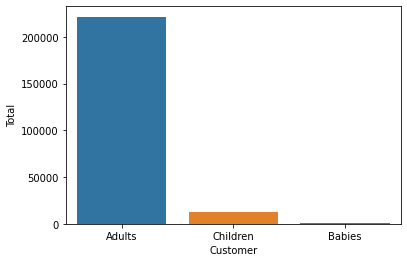

In [ ]:
df = pd.DataFrame(data={'Customer':['Adults','Children','Babies'],'Total':[hotel['adults'].sum(),hotel['children'].sum(),hotel['babies'].sum()]})
sns.barplot(x=df['Customer'],y=df['Total'])
plt.show()

**Interpretation:** It is clear that adults outnumber children and babies. We may add the children and babies as one entity later.

### 1d- Target Variable: Cancellation Status
  

#### I-Booking Percentage per Cancellation Status



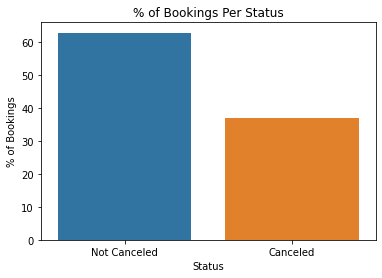

In [ ]:
# Visualizing the % of Bookings per status
plt.figure()
plt.title("% of Bookings Per Status")
sns.barplot(x=hotel['is_canceled'].unique(),y=hotel['is_canceled'].value_counts(normalize=True)*100)
plt.xlabel("Status")
plt.ylabel("% of Bookings")
plt.xticks(ticks=[0,1],labels=['Not Canceled','Canceled'])
plt.show()


**Interpretation**: 37% of the bookings have been canceled as stated D-Edge Survey

#### II-Cancellation Percentage Per Hotel Type

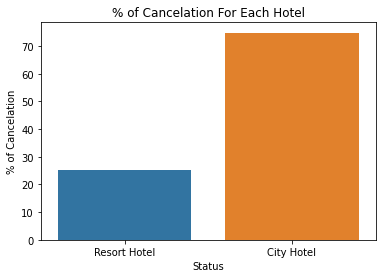

In [ ]:
fig= plt.figure()

# Dataframe of only canceled reservations
cancel = hotel[hotel['is_canceled']==1]

# Visualziing % of Cancelation per Hotel Type
sns.barplot(x=cancel['hotel'].unique(),y=cancel['hotel'].value_counts(normalize=True).sort_values()*100)
plt.xlabel("Status")
plt.ylabel("% of Cancelation")
plt.title("% of Cancelation For Each Hotel")
plt.show()


**Interpretation**: Out of 37% canceled reservations, around 25% belonged to Resort Hotels and 75% to City Hotels. In other words, a customer is more likely to cancel a reservation if he/she booked a room in a city hotel.

#### III-Correlation with Numerical Features

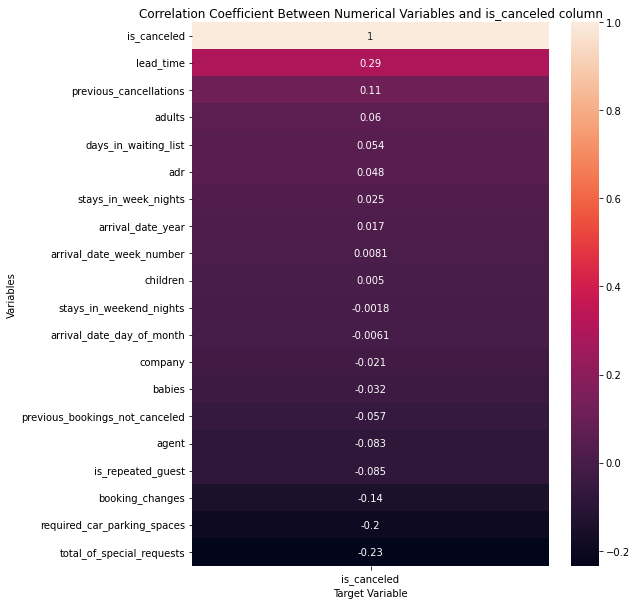

In [ ]:
fig = plt.figure(figsize=(8,10))
ax = sns.heatmap(hotel.corr()[['is_canceled']].sort_values('is_canceled', ascending=False), annot = True)
ax.set_title('Correlation Coefficient Between Numerical Variables and is_canceled column')
ax.set_xlabel('Target Variable')
ax.set_ylabel('Variables')
plt.show()

Given the outcome above, the five most important features are **lead_time**, **total_of_special_requests**, **required_car_parking_spaces**, **booking_changes**, and **previous_cancellations**. More investigation shall be conducted to check whether there is assocation between these variables with target variable **is_canceled**.

#### IV-Lead Time (Days)

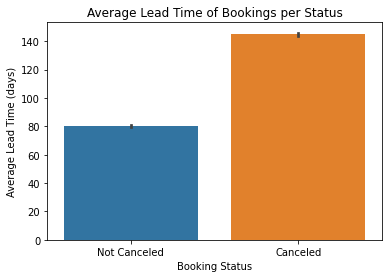

In [ ]:
# Visualizing the average lead time for canceled and not canceled bookings
plt.figure()
sns.barplot(x=hotel['is_canceled'],y=hotel['lead_time'])
plt.title("Average Lead Time of Bookings per Status")
plt.xlabel("Booking Status")
plt.ylabel("Average Lead Time (days)")
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])
plt.show()

**Interpretation**: The bar plot shows there is a significant difference in the average lead time of Bookings between canceled and not canceled bookings implying that it might be a potential predictor in the model. Generally speaking, it makes sense since as the lead time increases, customers have more time to cancel the reservation which is probably due to certain unforeseen circumstances.

#### V-Waiting List (Days)

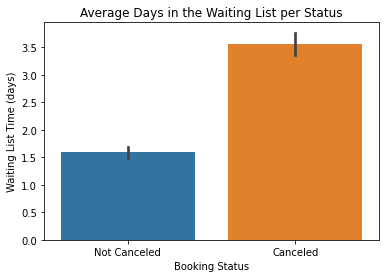

In [ ]:
# Visualizing the average days in the waiting list for canceled and not canceled bookings
plt.figure()
sns.barplot(x=hotel['is_canceled'],y=hotel['days_in_waiting_list'])
plt.title("Average Days in the Waiting List per Status")
plt.xlabel("Booking Status")
plt.ylabel("Waiting List Time (days)")
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])
plt.show()

**Interpretation**: The longer the customer waits for booking confirmation, the more likely to cancel his/her reservation.

#### VI-Number of Special Requests

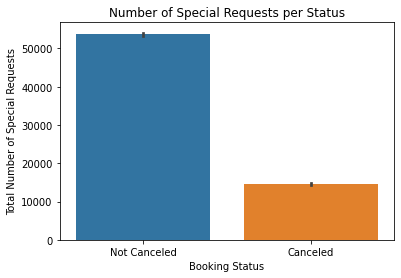

In [ ]:
# Visualizing the number of special reequests for canceled and not canceled bookings
plt.figure()
sns.barplot(x=hotel['is_canceled'],y=hotel['total_of_special_requests'],estimator=np.sum)
plt.title("Number of Special Requests per Status")
plt.xlabel("Booking Status")
plt.ylabel("Total Number of Special Requests")
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])
plt.show()

**Interpretation**: As the number of special requests increases, the likelihood of cancelation decreases. This indicates that customers will less likely to cancel their reservation if their requests has been satisfied.

#### VII-Car Parking Requests

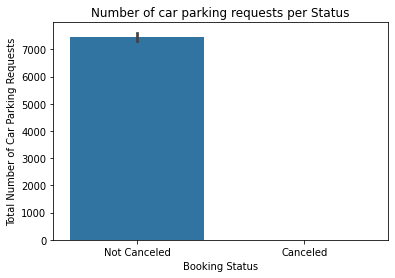

In [ ]:
# Visualizing the number of car parking requests for canceled and not canceled bookings
plt.figure()
sns.barplot(x=hotel['is_canceled'],y=hotel['required_car_parking_spaces'],estimator=np.sum)
plt.title("Number of car parking requests per Status")
plt.xlabel("Booking Status")
plt.ylabel("Total Number of Car Parking Requests")
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])
plt.show()

**Interpretation**: Car Parking service can be considered as a special request from the customer. It is clearly demonstrated the availability of car parking space make customers less likely to cancel. In other words, adding parking spaces will help in reducing cancellations.

#### VIII-Previous Cancellation

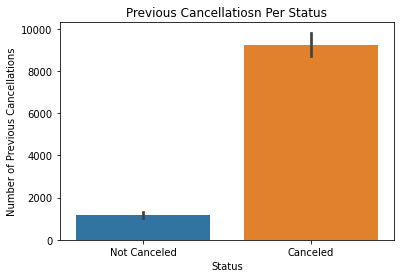

In [ ]:
# Visualizing the number of previous cancellations for canceled and not canceled bookings
plt.figure()
sns.barplot(x=hotel['is_canceled'],y=hotel['previous_cancellations'],estimator=np.sum)
plt.title("Previous Cancellatiosn Per Status")
plt.xlabel("Status")
plt.ylabel("Number of Previous Cancellations")
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])
plt.show()

**Interpretation**: A customer's prior history of cancellation is more highly correlated with whether or not the current booking will be canceled.

#### IX-Comparing Assigned Rooms to Resereved Rooms

In [ ]:
# Creating a new column unassigned to check whether the customer received the room he/she reserved.
hotel['unassigned'] = hotel.apply(lambda i: 1 if i['reserved_room_type']!=i['assigned_room_type'] else 0,axis=1)

In [ ]:
# Loading data again to check the unassigned column
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,unassigned
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,01/07/2015,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,01/07/2015,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,02/07/2015,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,02/07/2015,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,03/07/2015,0


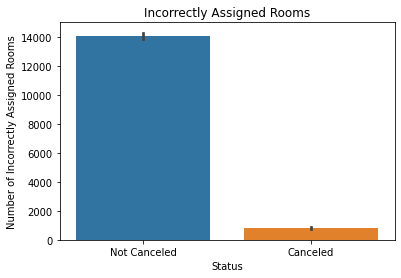

In [ ]:
# Visualizing the number of unassigned rooms for canceled and not canceled bookings
plt.figure()
sns.barplot(x=hotel['is_canceled'],y=hotel['unassigned'],estimator=np.sum)
plt.title("Incorrectly Assigned Rooms")
plt.xlabel("Status")
plt.ylabel("Number of Incorrectly Assigned Rooms")
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])
plt.show()

**Interpretation**: Suprisingly, customers are not likely to cancel their reservations even if their reserved room types changed

#### X-Deposit Type

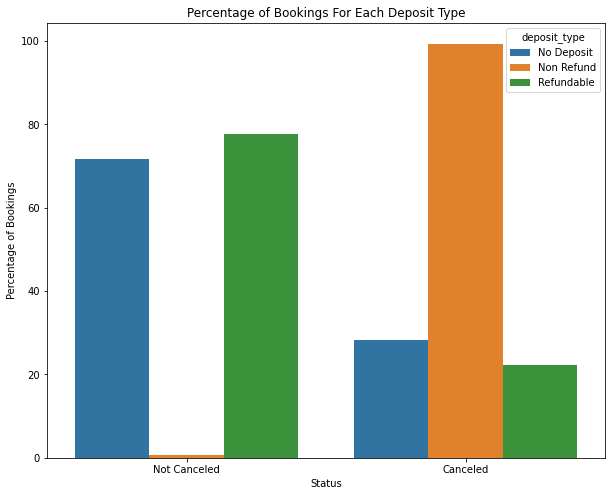

In [ ]:
# Creating a dataframe for percentage of bookings for each deposit type per cancellation status
deposits = (hotel.groupby(['deposit_type'])['is_canceled']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('is_canceled'))
# Visualing the percentage of bookings for each deposity type per canellation status
plt.figure(figsize=(10,8))
sns.barplot(x="is_canceled", y="percentage", hue="deposit_type", data=deposits)
plt.title("Percentage of Bookings For Each Deposit Type")
plt.xlabel("Status")
plt.ylabel("Percentage of Bookings")
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])
plt.show()

**Interpretation**: Surprisingly, customers who pay a non-refundable deposit are more likely to cancel their reservations

#### XI-Market Segment

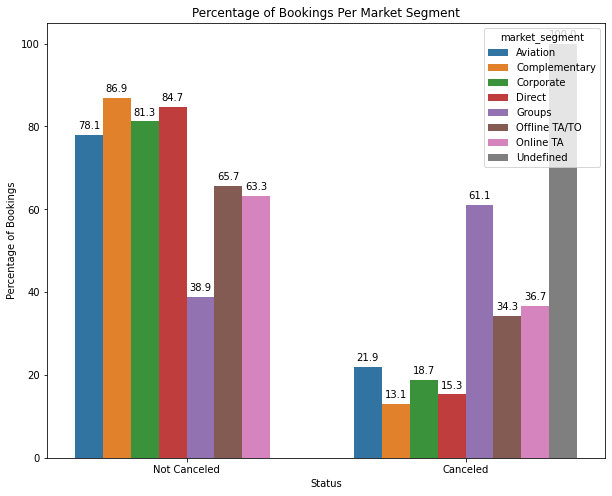

In [ ]:
# Creating a dataframe for percentage of bookings for each market segment per cancellation status
deposits = (hotel.groupby(['market_segment'])['is_canceled']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('is_canceled'))
# Visualing the percentage of bookings for each deposity type per canellation status
plt.figure(figsize=(10,8))
bplot=sns.barplot(x="is_canceled", y="percentage", hue="market_segment", data=deposits)
for p in bplot.patches:
    bplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Percentage of Bookings Per Market Segment")
plt.xlabel("Status")
plt.ylabel("Percentage of Bookings")
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])

plt.show()

**Interpretation**: Most customers who canceled are those who booked from Groups and Undefined market segment whereas Direct Bookings had the lowest cancellation rate.

#### XII-Average Daily Rate

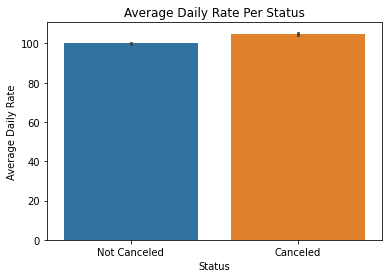

In [ ]:
# Visualizing the average daily rates for canceled and not canceled bookings
plt.figure()
sns.barplot(x=hotel['is_canceled'],y=hotel['adr'])
plt.title("Average Daily Rate Per Status")
plt.xlabel("Status")
plt.ylabel("Average Daily Rate")
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])
plt.show()

**Interpretation:** Average Daily Rates seems to be the same for canceled and not canceled bookings. Therefore, adr may not be a potential predictor for cancelation status

#### XIII-Cancellation Ratio by Month

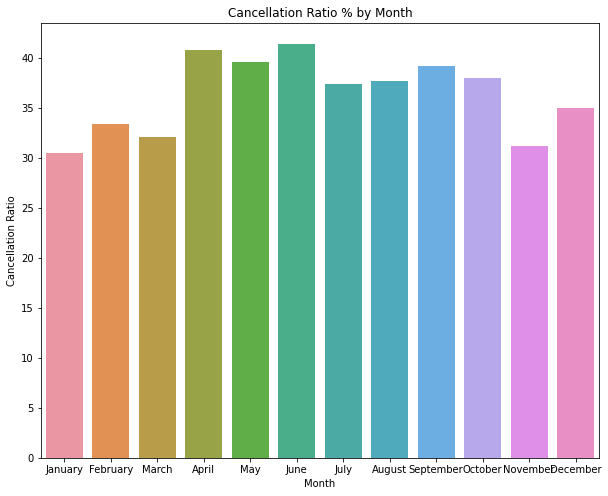

In [ ]:
# Creatinga a dataframe to calculate the cancelation ratio for each month
cancelation_by_month = (hotel.groupby(['arrival_date_month'])['is_canceled']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('is_canceled'))
# Sorting the Dataframe by months of a year
cancelation_ratio = sd.Sort_Dataframeby_Month(cancelation_by_month,'arrival_date_month')
# Selecting the cancelation percentage
cancelation_ratio.drop(cancelation_ratio.loc[cancelation_ratio['is_canceled']==0].index,inplace=True)
# Plotting a Line Plot to visualize the cancellation percentage
plt.figure(figsize=(10,8))
sns.barplot(x="arrival_date_month", y="percentage", data=cancelation_ratio)
plt.title("Cancellation Ratio % by Month")
plt.xlabel("Month")
plt.ylabel("Cancellation Ratio")

plt.show()

**Interpretation**: The canellation ratios are bigger in Spring and Summer and lowest during Winter. This is expected since most people spend their vacations during spring and summer. As the number of bookings increase, there is a high chance a booking will be canceled.

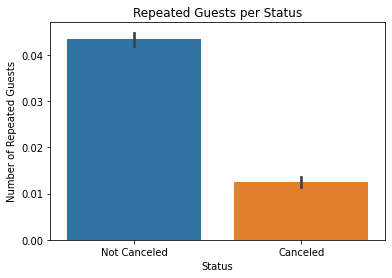

In [ ]:
# Visualizing the average daily rates for canceled and not canceled bookings
plt.figure()
sns.barplot(x=hotel['is_canceled'],y=hotel['is_repeated_guest'])
plt.title("Repeated Guests per Status")
plt.xlabel("Status")
plt.ylabel("Number of Repeated Guests")
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])
plt.show()  

## Part 2-Baseline System

### 2a-Model Preparation

Our goal is to build a model to predict whether a reseravation will be canceled or not. To do so, we will build first a baseline model as reference that we will use it to compare with other models.

Before modeling, we have to make some adjustments to the variables so that model can understand them well such as one hot encoding the selected categorical features.

Based on the EDA, some features are dropped from model as they are cosnidered redundant or not highly correlated. For example:

*   **reservation_status_date** is excluded from the model as a model cannot take datetime objects and provide no additional information.

*   **adr** is removed as there is no huge difference in the average adr between canceled and not canceled bookings. In addition all uncorrelated variables will be dropped as shown in the heatmap.

*   **agent** and **company** features include a large amount of categorical data that are not defined. Thereby, it is difficult to interpret. However, it is important to note that **market_segment** and **distribtuion_channel** features contain the type of agent and company. 

*   **arrival_date_year**,**arrival_date_week_number**,**arrival_date_day_of_month** will be excluded as **arrival_date_month** contains the seasonality power.










In [ ]:
X = hotel.drop(columns=['is_canceled','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month',
                             'stays_in_weekend_nights','stays_in_week_nights','meal','is_repeated_guest',
                             'previous_bookings_not_canceled','agent','company','adr','reservation_status_date',
                             'children','babies','unassigned'])
y = hotel['is_canceled']

In [ ]:
# Selecting the categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
# Selecting the numerical features
numerical_features = X.select_dtypes(include=['int64']).columns.tolist()

In [ ]:
# Categorical Pipeline by replacing missing values with most frequent value and one hot encoding
categorical_pipeline = Pipeline(steps=[
                                        ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'))])


# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers =[ ('cat', categorical_pipeline, categorical_features)])

# Logisitc Regression
model = LogisticRegression()

# Finalizing the Pipeline
pipe = make_pipeline(preprocessor,model)

### 2b-Modeling

In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=42, shuffle=True)
#evaluate model
scores = cross_val_score(pipe, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# report performance
print('Cross Validation AUC: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores), np.std(scores)))

Cross Validation AUC: 0.840, Standard Deviation: (0.004)


### 2c-Plotting ROC Curves For 5 Folds

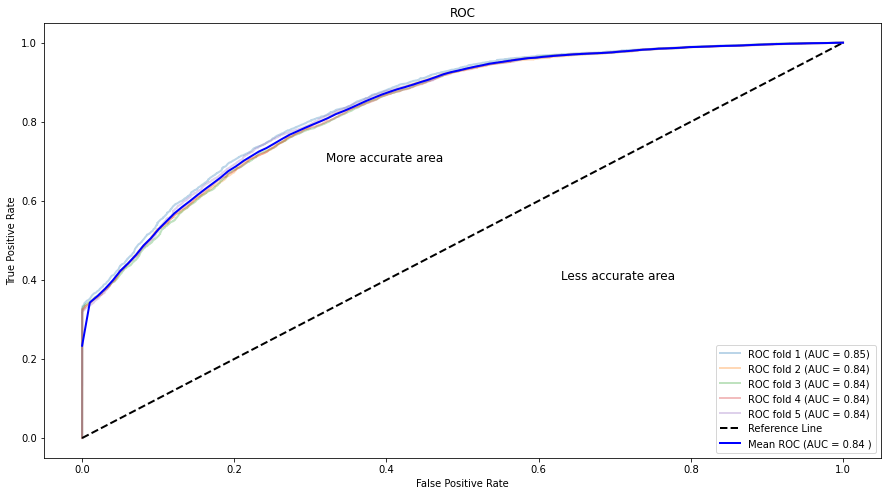

In [ ]:
# Creating Figure
fig = plt.figure(figsize=(15,8))
# pipe = make_pipeline(StandardScaler(), LogisticRegression())
tprs = []
aucs = []
# Create fpr (x-axis) evenly spaced numbers of interval 0.01 from 0 to 1
mean_fpr = np.linspace(0,1,100)
# Counter for folds
i = 1
# Splitting the cross-validated data of each fold
for train,test in cv.split(X,y):
    # Fit the Logistic Regression Model and predict the probabilites
    prediction = pipe.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    # Get the FPR, TPR and Threshold
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    # Linear Interpolation
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    # Get the auc score
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    # Plot the points
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
# Plotting the Reference Line
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black',label='Reference Line')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

# a warning will be raised since some of the features need to be standardized

## Part 3-Preprocessing

In [ ]:
# replace outliers
def replace_outliers(df):
  
  num = df.select_dtypes(include=['float', 'int']).columns.tolist() 
    # enumerate each column
  for i in num:
        
    
        # calculate statistics
    q25, q75 = np.percentile(df[i],25),np.percentile(df[i],75)
    iqr = q75 - q25
        # define bounds
    cut_off = iqr*1.5
    lower,upper = q25 - cut_off, q75 + cut_off
    outliers = [x for x in df[i] if x < lower or x > upper]
    # replace value
    df.loc[df[i].isin(outliers),i]=np.median(df[i])
        
  return df

### 3a-Preprocessing Technique 1 - Standardization, Normalization, and One Hot Encoding

In [ ]:
# Features
X1 = hotel.drop(columns=['is_canceled','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month',
                             'stays_in_weekend_nights','stays_in_week_nights','meal','is_repeated_guest',
                             'previous_bookings_not_canceled','agent','company','adr','reservation_status_date',
                            'children','babies','unassigned'])
# Target Variable
y = hotel['is_canceled']

In [ ]:
# Selecting the categorical features
categorical_features = X1.select_dtypes(include=['object']).columns.tolist()
# Selecting the numerical features
numerical_features = X1.select_dtypes(include=['int64']).columns.tolist()

In [ ]:

# Categorical Pipeline by replacing missing values with most frequent value and one hot encoding
categorical_pipeline = Pipeline(steps=[
                                        ('impute',SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                                        ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'))])

# Numerical Pipeline by replacing missing values with mean, standardization and normalization

numerical_pipeline = Pipeline(steps=[('imputer', SimpleImputer(missing_values=np.NaN)),
                                       ('ss',StandardScaler()),
                                      ('normalize',MinMaxScaler())
                                      ])
                              
# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers =[
                                                
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Logisitc Regression
model = LogisticRegression()

# Finalizing the Pipeline
pipe = make_pipeline(preprocessor,model)

In [ ]:
# Evaluate Model
scores=cross_val_score(pipe,X1,y,cv=cv,scoring='roc_auc',n_jobs=-1)
print('Cross Validation AUC: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores), np.std(scores)))

Cross Validation AUC: 0.887, Standard Deviation: (0.003)


After scaling, normalizing the numerical variables and one hot encoding the categorical one, the AUC increased to 0.887 and standard deviation decreased slightly to 0.003.

### 3b-Preprocessing Technique 2 - Standradization, Normalization, Outiler Replacement and One Hot Encoding

In [ ]:
# Create New Pipeline

# Categorical Pipeline by replacing missing values with most frequent value and one hot encoding
categorical_pipeline = Pipeline(steps=[
                                        ('impute',SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                                        ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'))])

# Numerical Pipeline by replacing outliers with median, replacing missing values with mean, and standardization

numerical_pipeline = Pipeline(steps=[
                                      ('outliers',FunctionTransformer(replace_outliers,validate=False)),
                                       ('imputer', SimpleImputer(missing_values=np.NaN)),
                                      ('ss',StandardScaler()),
                                     ('normalize',MinMaxScaler())
                                     
                                       ])
                              
# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers =[
                                                
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Logisitc Regression
model = LogisticRegression()

# Finalizing the Pipeline
pipe = make_pipeline(preprocessor,model)

In [ ]:
# Evaluate
scores=cross_val_score(pipe,X1,y,cv=cv,scoring='roc_auc',n_jobs=-1)
print('Cross Validation AUC: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores), np.std(scores)))

Cross Validation AUC: 0.868, Standard Deviation: (0.003)


After scaling,normalizing the numerical variables, imputing outliers and one hot encoding the categorical one, the AUC increased to 0.868 and standard deviation decreased slightly to 0.003.

### 3c-Preprocessing Technique 3-Feature Extraction

In this technique, we will try to create a new columns and group them. For example, **booking_changes** will have a value of zero if the cusotmer never changed his/her booking, otherwise 1.

**country** column will be changed to either Local or International since the hotels are located in Portugal, therefore any booking reserved by a Portuguese will be considered Local otherwise International.

Also, the unassigned column was already added that compare the **reserved_room_type** with **assigned_room_type**:

*   1: The assigned room is different from the reserved room once booked
*   0: The assigned room is same as the reserved room once booked




#### I-Creating New Features

In [ ]:
# Change booking_changes column
def booking_changes(row):
    if (row['booking_changes'] == 0):
        return 0
    else :
        return 1
# Change required_car_spaces column
def parking(row):
    if (row['required_car_parking_spaces'] < 1):
        return 0
    else :
        return 1
# Change country column to either Local (Portugal) or International (Other countries)

def country(row):
    if (row['country'] == 'PRT'):
        return 'Local'
    else :
        return 'International'
# Change previos_cancellation column
def cancellation(row):
    if (row['previous_cancellations'] == 0):
        return 0
    else :
        return 1

In [ ]:
hotel_try = hotel.copy()
hotel_try['is_booking_changes'] = hotel_try.apply(booking_changes, axis = 1)
hotel_try['parking_space'] = hotel_try.apply(parking, axis = 1)
hotel_try['location'] = hotel_try.apply(country, axis = 1)
hotel_try['canceled_before'] = hotel_try.apply(country, axis = 1)

In [ ]:
# Features
X2 = hotel_try.drop(columns=['is_canceled','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month',
                             'stays_in_weekend_nights','stays_in_week_nights','meal','is_repeated_guest',
                             'previous_bookings_not_canceled','agent','company','adr','reservation_status_date',
                            'children','babies','country','reserved_room_type','assigned_room_type','previous_cancellations','required_car_parking_spaces','booking_changes'])
# Target Variable

y = hotel_try['is_canceled']



# Selecting the categorical features
categorical_features = X2.select_dtypes(include=['object']).columns.tolist()
# Selecting the numerical features
numerical_features = X2.select_dtypes(include=['int']).columns.tolist()

#### II-Pipeline

In [ ]:
# Categorical Pipeline by replacing missing values with most frequent value and one hot encoding
categorical_pipeline = Pipeline(steps=[
                                        ('impute',SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                                        ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'))])
# Numerical Pipeline by replacing outliers with median, replacing missing values with mean, and standardization

numerical_pipeline = Pipeline(steps=[
                                      # ('outliers',FunctionTransformer(replace_outliers,validate=False)),
                                       ('imputer', SimpleImputer(missing_values=np.NaN)),
                                       ('normalize',MinMaxScaler())])
                              
# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers =[
                                                
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Logisitc Regression
model = LogisticRegression()

# Finalizing the Pipeline
pipe = Pipeline(steps=[('preprocessor',preprocessor),
                       ('Logistic regression',model)])
pipe = make_pipeline(preprocessor,model)

#### III-Evaluation

In [ ]:
scores=cross_val_score(pipe,X2,y,cv=cv,scoring='roc_auc',n_jobs=-1)
print('Cross Validation AUC: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores), np.std(scores)))

Cross Validation AUC: 0.884, Standard Deviation: (0.003)


After converting countries to continent and using **unassigned** column, the AUC increased from 0.84 to 0.886, and the standard deviation decreased to 0.003 (almost neglibile).

### 3d-Warp-Up

All the mentioned preprocessing techniques improved the AUC with Logesitc Regression Model. For simplicity and computational reasons, we will choose **preprocessing technique 3** that included new features such as converting country to Local or International,**unassigned** column that resembles the difference between **reserved_room_type** and **assigned_room_type**, grouping **previous_cancellations**,booking_changes**, and **required_car_parking_spaces**. In addition, the numerical variables were imputed and normalized.

It is important to note that **country** column contains more than 170 unique values in which which will impact the fitting time for the models.

The AUC and standard deviation after applying technique 3 is 0.884 and 0.003.

## Part 4-Feature Selection

#### 4a-RFECV

In [ ]:
# Preprocess the Data
X_rf = preprocessor.fit_transform(X2)
# Apply RFECV
selector = RFECV(estimator=LogisticRegression(), step=5, cv=cv,min_features_to_select=5, scoring='roc_auc')

# Fit
selector.fit(X_rf,y)

# Evaluate
scores = cross_val_score(LogisticRegression(), X_rf, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Cross Validation AUC: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores), np.std(scores)))


Cross Validation AUC: 0.884, Standard Deviation: (0.003)


#### 4b-Selection of Most Powerful Predictors

In [ ]:
# this fuction is taken from "https://johaupt.github.io/blog/columnTransformer_feature_names.html" as there wasn't a method to get the feature names after preprocessing since a numpy array will be returned without names

def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
      
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [ ]:
# Get feature names aftre preprocessing
feature_names=get_feature_names(preprocessor)
# Get support for each variable
rfecv_support = selector.support_
# Get rank for each variable
rfecv_rank = selector.ranking_

In [ ]:
# Creating a dataframe of variables with their rank
variables = pd.DataFrame(zip(feature_names,rfecv_support,rfecv_rank),columns=['Feature','Selected','Rank'])
variables.sort_values(by='Rank')

,Feature,Selected,Rank
0,num__lead_time,True,1
23,ohe__x2_Corporate,True,1
24,ohe__x2_Direct,True,1
26,ohe__x2_Offline TA/TO,True,1
27,ohe__x2_Online TA,True,1
28,ohe__x2_Undefined,True,1
29,ohe__x3_Corporate,True,1
30,ohe__x3_Direct,True,1
31,ohe__x3_GDS,True,1
32,ohe__x3_TA/TO,True,1


47 variables are significant ranked 1st according to RFECV

Every model run after RFECV will take only features with Rank = 1 or support = True. So, the coefficients(betas) of the Logisitc Regression is 47 and sorting them according to their coefficients will help us figure out the features with highest impact on the target variable.

In [ ]:
# Drop insignificant variabales
significant_variables = variables.drop(variables.loc[variables['Selected'] == False].index).reset_index(drop=True)

# Get coefficients of the logistic regression model
rfecv_imp = selector.estimator_.coef_[0]

significant_variables['Coef'] = rfecv_imp
significant_variables['Absolute Coef'] = abs(significant_variables['Coef'])
significant_variables.sort_values(by='Absolute Coef',ascending=False)

,Feature,Selected,Rank,Coef,Absolute Coef
6,num__parking_space,True,1,-8.021475,8.021475
1,num__adults,True,1,6.557547,6.557547
0,num__lead_time,True,1,4.192293,4.192293
3,num__total_of_special_requests,True,1,-3.682425,3.682425
32,ohe__x4_Non Refund,True,1,2.859062,2.859062
4,num__unassigned,True,1,-2.047492,2.047492
31,ohe__x4_No Deposit,True,1,-1.723830,1.723830
2,num__days_in_waiting_list,True,1,-1.304167,1.304167
24,ohe__x2_Online TA,True,1,1.220739,1.220739
30,ohe__x3_Undefined,True,1,1.153807,1.153807


Looking at the above dataframe, the five most powerful predictors are **parking_space**, **adults**, **lead_time**, **deposit_type**, and **total_of_special_requets**.

*   **parking_space** has a huge impact on the customer intention to canncel his/her booking. If a customer orders a parking space, the probability he/she will cancel is almost zero.

*   **adults** is positively related with cancellation of a booking. The more adults are inclued in one reservation, the more likely the reservation will be cacneled later.

*  **lead_time** has a positive association with cancellation of bookings. As the lead_time increases, the probability he/she will cancel is almost 100%.

*   **deposit_type** the odds of canceling a booking after paying a non-refundable deposit is 2.9 times more than refundable payments.

*   **total_of_special_requets** is negatively related with cancellation of a booking. If a customer requests something special, the probability of cancellation is 2.7%. The more requests fulfilled, the less likely a customer will cancel his/her booking.

All the mentioned variables make sense as they are closely related to the intention of a customer to cancel a reservation. 









#### 4c-New Model with less Features

We will pick the 5 most powerful variables.

In [ ]:
X_new = hotel_try[['parking_space','adults','lead_time','deposit_type','total_of_special_requests']]
y_new = hotel_try['is_canceled']

# Selecting the categorical features
categorical_features = X_new.select_dtypes(include=['object']).columns.tolist()
# Selecting the numerical features
numerical_features = X_new.select_dtypes(include=['int']).columns.tolist()
# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers =[
                                                
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Logisitc Regression
model = LogisticRegression()

# Finalizing the Pipeline
pipe = Pipeline(steps=[('preprocessor',preprocessor),
                       ('Logistic regression',model)])
pipe = make_pipeline(preprocessor,model)


# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=42, shuffle=True)

scores = cross_validate(pipe,X_new,y_new,scoring=['roc_auc','accuracy'],return_train_score=True,cv=cv)
# report performance
print('Cross Validation AUC: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['test_roc_auc']), np.std(scores['test_roc_auc'])))
print('Train : Cross Validation Accuracy: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['train_accuracy']), np.std(scores['train_accuracy'])))
print('Test : Cross Validation Accuracy %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['test_accuracy']), np.std(scores['test_accuracy'])))


Cross Validation AUC: 0.780, Standard Deviation: (0.003)
Train : Cross Validation Accuracy: 0.749, Standard Deviation: (0.001)
Test : Cross Validation Accuracy 0.749, Standard Deviation: (0.001)


Given the outcome above, the AUC is low compared to the baseline and the test accuracy is 0.75 which can misclassify some bookings cancellations. Therefore, we will pick some variables with absolute coefficients greater than 1.

In [ ]:

X_new = hotel_try[['canceled_before','parking_space','adults','deposit_type','lead_time','distribution_channel','unassigned','market_segment','total_of_special_requests']]
y_new = hotel_try['is_canceled']

# Selecting the categorical features
categorical_features = X_new.select_dtypes(include=['object']).columns.tolist()
# Selecting the numerical features
numerical_features = X_new.select_dtypes(include=['int']).columns.tolist()
# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers =[
                                                
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Logisitc Regression
model = LogisticRegression()

# Finalizing the Pipeline
pipe = Pipeline(steps=[('preprocessor',preprocessor),
                       ('Logistic regression',model)])
pipe_lg = make_pipeline(preprocessor,model)


# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=42, shuffle=True)


#evaluate model
scores = cross_validate(pipe_lg,X_new,y_new,scoring=['roc_auc','accuracy'],return_train_score=True,cv=cv)
# report performance
print('Cross Validation AUC: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['test_roc_auc']), np.std(scores['test_roc_auc'])))
print('Train : Cross Validation Accuracy: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['train_accuracy']), np.std(scores['train_accuracy'])))
print('Test : Cross Validation Accuracy %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['test_accuracy']), np.std(scores['test_accuracy'])))

Cross Validation AUC: 0.879, Standard Deviation: (0.003)
Train : Cross Validation Accuracy: 0.795, Standard Deviation: (0.001)
Test : Cross Validation Accuracy 0.795, Standard Deviation: (0.002)


The AUC increased significantly from 0.78 to 0.879 after adding four additional features as well as the accuracy

### 4d-Percentage Reduction of Features

In [ ]:
nb_features_selected = len(X_new.columns)
nb_features_baseline = len(X.columns)
percentage_reduction = ((nb_features_selected-nb_features_baseline)/(nb_features_baseline))
print('The number of features reduced to {:.0%} where {} of {} features were used'.format(abs(percentage_reduction),nb_features_selected,nb_features_baseline))

The number of features reduced to 44% where 9 of 16 features were used


## Part 5-Model Optimization and Selection

KNN is a lazy learner, so the training time is zero (memorizing the training data), but testing the KNN is expensive as it depends on the number of test samples. Also, SVM fitting time depends on the training sample. To tackle this, we will pick a stratified sample using train_test_split.

In [ ]:
from sklearn.model_selection import train_test_split

X_1,X_2,y_1,y_2 = train_test_split(X_new,y_new,stratify = y_new,random_state=42,shuffle=True,test_size=0.75)

#### 5a-KNN

Before fidning the optimal parameter for KNN, we will try K Neighbors classification with k=5 and k=51 in order to see if there is a significant change which calls for model optimization.

In [ ]:
# Intialize KNN with N = 5
knn_5 = KNeighborsClassifier()
pipeline = make_pipeline(preprocessor,knn_5)
scores = cross_val_score(pipeline, X_1, y_1, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Cross Validation AUC: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores), np.std(scores)))


Cross Validation AUC: 0.874, Standard Deviation: (0.003)


In [ ]:
# Intialize KNN with N = 51
knn_51 = KNeighborsClassifier(n_neighbors=51)
pipeline = make_pipeline(preprocessor,knn_51)
scores = cross_val_score(pipeline, X_1, y_1, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Cross Validation AUC: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores), np.std(scores)))

Cross Validation AUC: 0.901, Standard Deviation: (0.003)


There is clear difference between k=5 and k=51. Thereby, it is recommended to find the optimal k for the KNN classifier

In [ ]:
# Find Optimal K-value
roc_auc = []

for i in range(1,100,2):
  # Create KNN model with K = i
 knn = KNeighborsClassifier(n_neighbors=i)
 pipeline = make_pipeline(preprocessor,knn)
 scores = cross_val_score(pipeline, X_1, y_1, scoring='roc_auc', cv=cv, n_jobs=-1)
 roc_auc.append(scores.mean())


Maximum AUC: 0.901, at K = 63


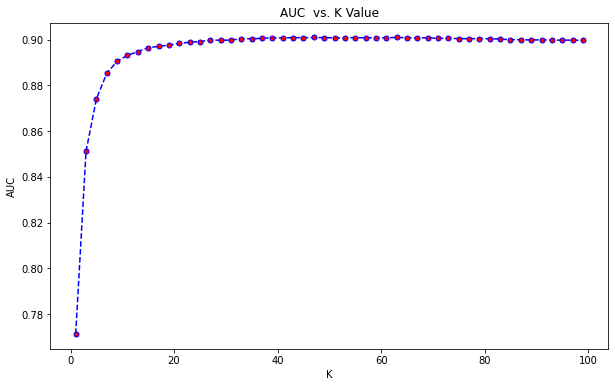

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100,2),roc_auc,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=5)
plt.title('AUC  vs. K Value')
plt.xlabel('K')
plt.ylabel('AUC')
# Find optimal K-value
ymax = max(roc_auc)
xpos = np.where(roc_auc == ymax)[0][0]
xmax = list(range(1,100,2))[xpos]
print("Maximum AUC: %.3f, at K =" % max(roc_auc),xmax)


In [ ]:
scores = cross_validate(pipeline,X_1,y_1,scoring=['roc_auc','accuracy'],return_train_score=True,cv=cv)
# report performance
print('Train : Cross Validation Accuracy: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['train_accuracy']), np.std(scores['train_accuracy'])))
print('Test : Cross Validation Accuracy %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['test_accuracy']), np.std(scores['test_accuracy'])))

Train : Cross Validation Accuracy: 0.825, Standard Deviation: (0.002)
Test : Cross Validation Accuracy 0.823, Standard Deviation: (0.003)


#### 5b-SVM

In [ ]:
# SVM default
svm_default = SVC()
pipeline_svm = make_pipeline(preprocessor,svm_default)
scores = cross_val_score(pipeline_svm, X_1, y_1, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Cross Validation AUC: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores), np.std(scores)))

Cross Validation AUC: 0.881, Standard Deviation: (0.003)


In [ ]:
# SVM with C = 10
svm_10= SVC(C=10,gamma=0.1)
pipeline_svm = make_pipeline(preprocessor,svm_10)
scores = cross_val_score(pipeline_svm, X_1, y_1, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Cross Validation AUC: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores), np.std(scores)))

Cross Validation AUC: 0.883, Standard Deviation: (0.003)


Given the outcome above, there is small change in the AUC value, and we will apply model optimization to see the best parameters.

In [ ]:
# Find the Optimal Parameter for SVC
svm = SVC()
param_grid = {'svc__C': [0.1, 1, 10,100],
              'svc__gamma': [1, 0.1, 0.01,0.001],
              'svc__kernel': ['rbf']}
pipeline_svm = make_pipeline(preprocessor,svm)
grid = GridSearchCV(pipeline_svm, param_grid=param_grid,n_jobs=-1,scoring='roc_auc',cv=cv)

In [ ]:
grid = grid.fit(X_1,y_1)

In [ ]:
grid.best_params_

{'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

In [ ]:
# SVM with best parameters
svm_100 = SVC(C=100,gamma=0.01)
pipeline_svm = make_pipeline(preprocessor,svm_100)
scores = cross_val_score(pipeline_svm, X_1, y_1, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Cross Validation AUC: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores), np.std(scores)))

Cross Validation AUC: 0.885, Standard Deviation: (0.003)


In [ ]:
scores = cross_validate(pipeline_svm,X_1,y_1,scoring=['roc_auc','accuracy'],return_train_score=True,cv=cv)
# report performance
print('Train : Cross Validation Accuracy: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['train_accuracy']), np.std(scores['train_accuracy'])))
print('Test : Cross Validation Accuracy %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['test_accuracy']), np.std(scores['test_accuracy'])))

Train : Cross Validation Accuracy: 0.811, Standard Deviation: (0.001)
Test : Cross Validation Accuracy 0.811, Standard Deviation: (0.003)


### 5c-Best Model

In [ ]:
# Calculating AUC and accuracy for each model

pipeline_knn = make_pipeline(preprocessor,KNeighborsClassifier(n_neighbors=63))
pipelines = [pipe_lg,pipeline_knn,pipeline_svm]
columns = ['Logistic Regression','KNN-63','SVM']

auc = []
acc = []


for i in pipelines:

  # Get scores of train and test 
  scores = cross_validate(i,X_1,y_1,scoring=['roc_auc','accuracy'],return_train_score=True,cv=cv)
  # Save AUC test score
  auc.append(np.mean(scores['test_roc_auc']))
  # Save accuracy test score
  acc.append(np.mean(scores['test_accuracy']))



In [ ]:
# Convert to Dataframe
model_evaluation = pd.DataFrame(zip(auc,acc),columns=['AUC','Accuracy'],index=columns)
pd.options.display.float_format = "{:,.2f}".format

In [ ]:
model_evaluation

,AUC,Accuracy
Logistic Regression,0.88,0.79
KNN-63,0.90,0.82
SVM,0.89,0.81


KNN is the most adequate model in terms of AUC and Accuracy

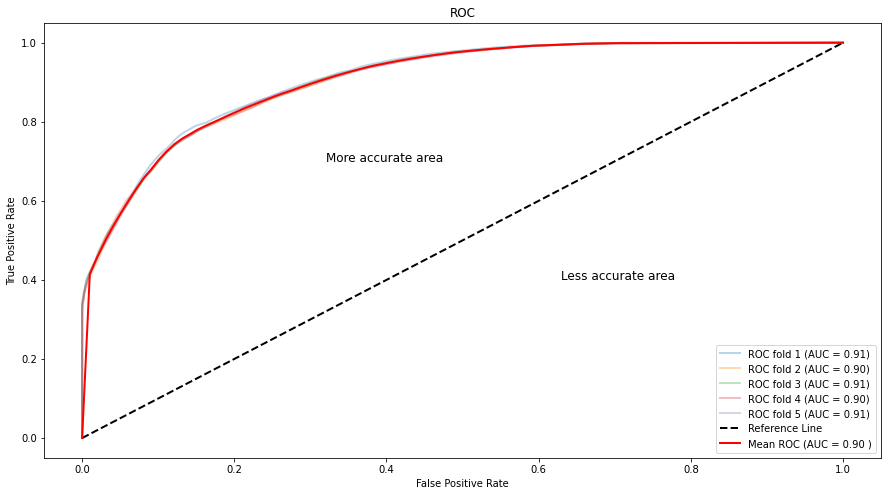

In [ ]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
# Plotting AUC curves
# Creating Figure
fig = plt.figure(figsize=(15,8))

# Intialize KNN with N = 33

tprs = []
aucs = []
# Create fpr (x-axis) evenly spaced numbers of interval 0.01 from 0 to 1
mean_fpr = np.linspace(0,1,100)
# Counter for folds
i = 1
# Splitting the cross-validated data of each fold
for train,test in cv.split(X_new,y_new):
    # Fit the KNN Model and predict the probabilites
    prediction = pipeline_knn.fit(X_new.iloc[train],y_new.iloc[train]).predict_proba(X_new.iloc[test])
    # Get the FPR, TPR and Threshold
    fpr, tpr, t = roc_curve(y_new[test], prediction[:, 1])
    # Linear Interpolation
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    # Get the auc score
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    # Plot the points
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
# Plotting the Reference Line
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black',label='Reference Line')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='red',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()



## Part 6-Conclusion

### 6a- Preprocessors, Features, and Model Selected

**Preprocessing Technique**: As mentioned before, preprocessing technique 3 was the optimal technique as it included grouping of some features in addition to one hot encoding  of categorical features,normalizing numerical features, and imputing missing values.

**Features Selected**: 

1.   **canceled_before**: adjusting **previous_cancellation** column by putting value 0 if a customer never canceled before, otherwise 1.

2.   **parking_space**: adjusting **required_car_parking_spaces** column by putting 0 if a customer did not requested a car parking, otherwise 1.

1.   **adults**

2.   **deposit_type**

1.   **lead_time**

2.   **distribution_channel**

1.   **unassigned**: Incorrectly assigned room type
2.   **market_segment**

1.   **total_of_special_requests**

**Best Model**: KNN with number of neighbors 63 performed the best in terms of AUC(0.9) and accuracy(0.82) compared to SVM and Logistic Regression. 












### 6b-Recommendations


1.   **Increase Direct Booking**: Direct booking had the lowest cancellation rate 13%. This suggets to increase the hotel reputation as some customers are meticulous and read many reviews before booking.


2.  **Ask for Any Special Requests**: Based on the analysis done, customers who did not request anything special are more likely to cancel their booking. So, giving the customer an option to add any requests right before confirming their reservation (before payement) will reconsider their choice and decrease cancellation rates.

1.   **Attract Customers That Drive**: None of the customers cancelled their bookings when they requested a car parking space. So, offering free parking and facilitating the process of renting a car will incentivize customers that drive especially Europeans who like to commute with car (process is much easier as they hold EU driving license).
2.   **Cancellation Policy**: set a booking deposit for customers who previously canceled their bookings. This will help hotels from losing revenue and protect them from last minute cancellations.





### 6c-Project Improvement



1.   Implement several classification models to see whether other model can classify booking cancellations better than the used models in this notebook.
2.   Ask for more important features such as age and apply customer segmentation to discover clusters. So, categorizing customers to **Family**, **Return Customer**, **Customer Attrition** and others. Then, we can study the behavior of these clusters and focus on customer retention.

